# Gravity & Kepler's Laws

### Import "standard" libraries

In [4]:
# Import libraries first
%matplotlib inline
import numpy as np
import scipy.interpolate as interpol
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx

import sys, logging, os, re
import time

# import seaborn as sns
import scipy
import scipy.io as sio
from math import pi

***
## Contents

- [Introduction](#Introduction)
- [Kepler's laws of planetary motion](#Kepler's-laws-of-planetary-motion)
    - [1st Law](#1st-Law)
    - [2nd Law](#2nd-Law)
    - [3rd Law](#3rd-Law)
- [Toy Model of the Solar System](#Toy-Model-of-the-Solar-System)
    

***
## Introduction

* 3rd Cen B.C. - Heliocentric model 
    * First  explicit argument for a Heliocentric model of the Solar System by Greek astronomer and mathematician Aristarchus of Samos.
* 140 A.D. - Epicycles
    * Presentation of  a physical realization of the universe as a set of nested spheres, in which he used the epicycles of his planetary model - by a Greco-Roman mathematician, astronomer Ptolemy of Alexandria. 
* 1543 - Copernicus
    * Sun in the center, planets in circles around the sun
    
* 1600s
    * Tycho Brahe: accurate observations
    * Johannes Kepler: path of planets = ellipsis 
***

## Kepler's laws of planetary motion

In astronomy, Kepler's laws of planetary motion are three scientific laws describing the motion of planets around the Sun:

1. The orbit of a planet is an ellipse with the Sun at one of the two foci.
2. A line segment joining a planet and the Sun sweeps out equal areas during equal intervals of time.
3. The square of the orbital period of a planet is proportional to the cube of the semi-major axis of its orbit.

source: [Wikipedia](https://en.wikipedia.org/wiki/Kepler%27s_laws_of_planetary_motion)

***


### 1st Law
### The orbit of a planet is an ellipse with the Sun at one of the two foci.

1.2. Cartesian equation
$$\frac {x^{2}}{a^{2}}+{\frac {y^{2}}{b^{2}}}=1 $$ 
$$ y=\pm {\frac {b}{a}}{\sqrt {a^{2}-x^{2}}}$$
$$ \text{focus:} \quad c=\pm \sqrt{a^2-b^2} $$

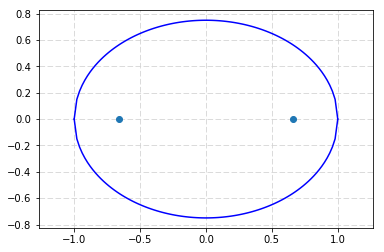

In [2]:
# Cartesian equation

a=1.       #semi-major axis 
b=0.75    #semi-minor axis

c=np.sqrt(a**2-b**2)   # Focus of the ellipsis

x = np.linspace(-1, 1, 100)   

plt.plot( x, b/a*np.sqrt(a**2-x**2),'b')
plt.plot( x, -b/a*np.sqrt(a**2-x**2),'b')
plt.plot([c,-c],[0,0],'o')

plt.axis('equal')
plt.grid(color='lightgray',linestyle='--')
plt.show()

1.1. Parametric equation:
$$ x = a \cos{t} $$
$$ y = b \sin{t} $$
$$ 0 \ge t \le 2\pi $$
$$ \text{focus:} \quad c=\pm \sqrt{a^2-b^2} $$


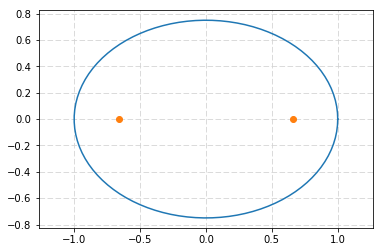

In [3]:
# Parametric equation
a=1.     #radius on the x-axis
b=0.75   #radius on the y-axis

c=np.sqrt(a**2-b**2)

t = np.linspace(0, 2*pi, 100)

plt.plot( a*np.cos(t) , b*np.sin(t) )
plt.plot([c,-c],[0,0],'o')

plt.axis('equal')
plt.grid(color='lightgray',linestyle='--')
plt.show()

### Interactive plot

In [1]:
from ipywidgets import interact, interactive
from IPython.display import clear_output, display, HTML

In [2]:
def f(a, b):
    plt.figure(figsize=(15,6))
    
    c=np.sqrt(a**2-b**2)

    t = np.linspace(0, 2*pi, 100)

    plt.plot( a*np.cos(t) , b*np.sin(t) )
    plt.plot([c,-c],[0,0],'o')

    plt.axis('equal')
    plt.grid(color='lightgray',linestyle='--')

In [5]:
interactive_plot = interactive(f, a=(0.0,1.0,0.1), b=(0.0,1.0,0.1))
output = interactive_plot.children[-1]
# output.layout.height = '350px'
interactive_plot

interactive(children=(FloatSlider(value=0.5, description='a', max=1.0), FloatSlider(value=0.5, description='b'…

***
### 2nd Law
### A line segment joining a planet and the Sun sweeps out equal areas during equal intervals of time.

* [Flash Simulator](http://astro.unl.edu/classaction/animations/renaissance/kepler.html)

<object classid="clsid:D27CDB6E-AE6D-11cf-96B8-444553540000" width="900" height="710"><param name="movie" value="kepler.swf" /><!--[if !IE]>--><object type="application/x-shockwave-flash" data="kepler.swf" width="900" height="710"><!--<![endif]--><p>flash animation</p><!--[if !IE]>--></object><!--<![endif]--></object>


<a href="http://astro.unl.edu/classaction/animations/renaissance/kepler.html"><img src="http://astro.unl.edu/classaction/animations/renaissance/kepler.jpg" alt="Planetary Orbit Simulator (NAAP)" title="Planetary Orbit Simulator (NAAP)" style="border-style: none"/></a>

<img src="Kepler-second-law.gif" width=50%>

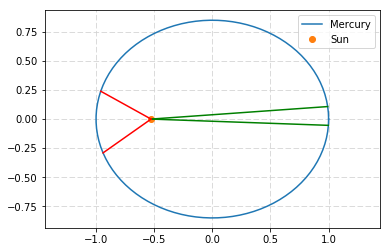

In [7]:
# Parametric equation
a=1.     #radius on the x-axis
b=0.85   #radius on the y-axis

c=np.sqrt(a**2-b**2)

t = np.linspace(0, 2*pi, 100)
x = a*np.cos(t)
y = b*np.sin(t)
plt.plot( x, y ,label='Mercury')
plt.plot([-c],[0],'o',label='Sun')
plt.legend()
plt.axis('equal')

plt.grid(color='lightgray',linestyle='--')
plt.plot([-c,x[2]],[0,y[2]],'g')
plt.plot([-c,x[-2]],[0,y[-2]],'g')

plt.plot([-c,x[55]],[0,y[55]],'r')
plt.plot([-c,x[45]],[0,y[45]],'r')
plt.show()

***
### 3rd Law
### The square of the orbital period of a planet is proportional to the cube of the semi-major axis of its orbit.

$$ T^2 \propto r^3 $$

<center>$T$: period of revolution</center>
<center>$r$: mean distance between planet and the Sun</center>

$$ T^2 = C r^3 $$

<center>$C$: constant (same for all planets of the solar system)</center>

<center>Data used by Kepler: </center>


|Planet|Mean distance to sun [AU]|Period [days]|C|
|------|-------------------------|-------------|
|Mercury|	0.389|	87.77|	7.64|
|Venus|	0.724|	224.70|	7.52|
|Earth|	1|	365.25|	7.50|
|Mars|	1.524|	686.95|	7.50|
|Jupiter|	5.2|	4332.62|	7.49|
|Saturn|	9.510|	10759.2|	7.43|


In [51]:
T = np.array([87.77, 224.7, 365.25, 686.95, 4332.62, 10759.2])
r = np.array([0.389, 0.724, 1 ,1.524, 5.2, 9.51])
Planets=['Mercury','Venus','Earth','Mars','Jupiter','Saturn']

[  7.43866135e-06]


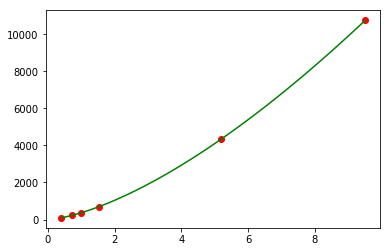

In [85]:
from scipy.optimize import  curve_fit   

def model(x, c):
         return np.sqrt(c * x**3)

   
popt, pcov = curve_fit(model, r,T)
rpkts = np.linspace(r[0],r[-1],100)
print(1/popt)
plt.plot(r,T,'ro')
plt.plot(rpkts,model(rpkts,popt),'g-')


In [84]:
pcov

array([[ 29957.20339605]])

array([  7.64111274e-06,   7.51639429e-06,   7.49582693e-06,
         7.50074922e-06,   7.49046589e-06,   7.42987641e-06])

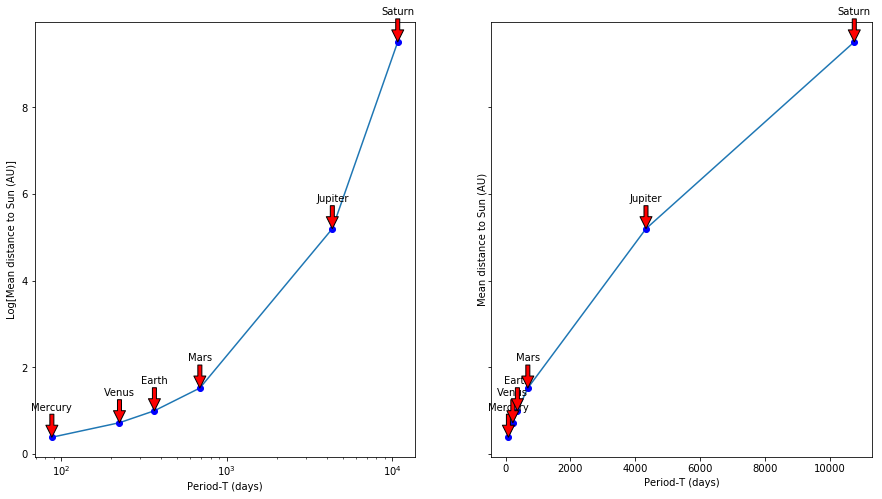

In [9]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 8),sharey=True)

ax1.plot(T,r)
ax1.plot(T,r,'bo')

ax1.set_xscale('log')
ax1.set_xlabel('Period-T (days)')
ax1.set_ylabel('Log[Mean distance to Sun (AU)]')

for i in range(0,T.size):
    ax1.annotate(Planets[i],
            xy=(T[i], r[i]), xycoords='data',
            xytext=(0,25), textcoords='offset points',
            arrowprops=dict(facecolor='red'),
            horizontalalignment='center', verticalalignment='bottom')


ax2.plot(T,r)
ax2.plot(T,r,'bo')
ax2.set_xlabel('Period-T (days)')
ax2.set_ylabel('Mean distance to Sun (AU)')

for i in range(0,T.size):
    ax2.annotate(Planets[i],
            xy=(T[i], r[i]), xycoords='data',
            xytext=(0,25), textcoords='offset points',
            arrowprops=dict(facecolor='red'),
            horizontalalignment='center', verticalalignment='bottom')


<center>Modern data <center>

|Planet|Mean distance to sun [AU]|Period [days]|C|
|------|-------------------------|-------------|
|Mercury|0.38710|87.9693|7.496|
|Venus  |	0.72333|224.7008|	7.496|
|Earth  |	1|	365.2564|	7.496|
|Mars   |1.52366|	686.9796|	7.495|
|Jupiter|5.20336|	4332.8201|	7.504|
|Saturn |9.53707|	10775.599|	7.498|
|Uranus |19.1913|	30687.153|	7.506|
|Neptune|30.0690|	60190.03|	7.504|

In [6]:
T_new=np.array([87.9993,224.7008,365.2564,686.9796,4332.8201,10775.599,30687.153,60190.03])
r_new=np.array([0.38710,0.72333,1,1.52366,5.20336,9.53707,19.1913,30.0690])
Planets_new=['Mercury','Venus','Earth','Mars','Jupiter','Saturn','Uranus','Neptune']

In [11]:
np.polyfit(r_new**3,T_new**2,3)

array([  3.89038661e-06,  -1.31951108e-01,   1.33970150e+05,
        -1.71842645e+04])

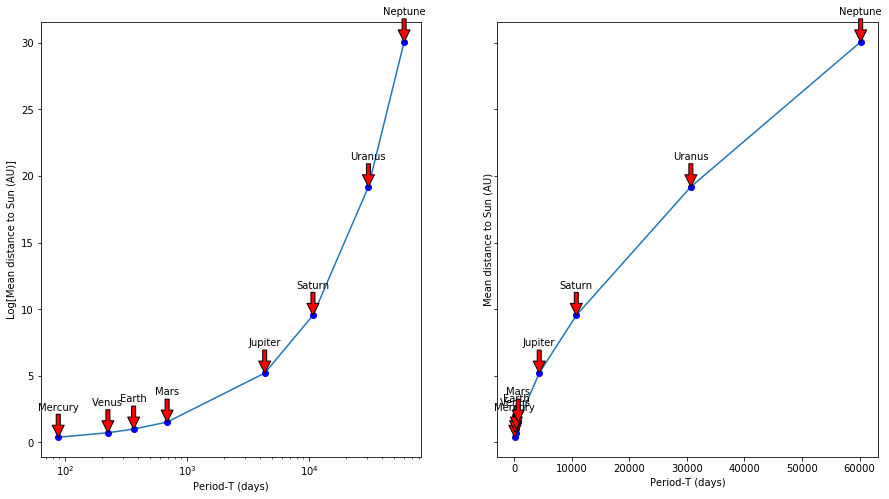

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(15, 8),sharey=True)

ax1.plot(T_new,r_new)
ax1.plot(T_new,r_new,'bo')

ax1.set_xscale('log')
ax1.set_xlabel('Period-T (days)')
ax1.set_ylabel('Log[Mean distance to Sun (AU)]')

for i in range(0,T_new.size):
    ax1.annotate(Planets_new[i],
            xy=(T_new[i], r_new[i]), xycoords='data',
            xytext=(0,25), textcoords='offset points',
            arrowprops=dict(facecolor='red'),
            horizontalalignment='center', verticalalignment='bottom')


ax2.plot(T_new,r_new)
ax2.plot(T_new,r_new,'bo')
ax2.set_xlabel('Period-T (days)')
ax2.set_ylabel('Mean distance to Sun (AU)')

for i in range(0,T_new.size):
    ax2.annotate(Planets_new[i],
            xy=(T_new[i], r_new[i]), xycoords='data',
            xytext=(0,25), textcoords='offset points',
            arrowprops=dict(facecolor='red'),

                 horizontalalignment='center', verticalalignment='bottom')

***
## Toy Model of the Solar System

* Data table by [NASA](https://nssdc.gsfc.nasa.gov/planetary/factsheet/)
<p>

<table role="presentation" border="2" cellspacing="1" cellpadding="4">
<tbody><tr>
  <td align="left"><b>&nbsp;</b></td>
  <td align="center" bgcolor="F5F5F5"><b>&nbsp;<a href="mercuryfact.html">MERCURY</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="venusfact.html">VENUS</a>&nbsp;</b></td>
  <td align="center" bgcolor="F5F5F5"><b>&nbsp;<a href="earthfact.html">EARTH</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="moonfact.html">MOON</a>&nbsp;</b></td>
  <td align="center" bgcolor="F5F5F5"><b>&nbsp;<a href="marsfact.html">MARS</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="jupiterfact.html">JUPITER</a>&nbsp;</b></td>
  <td align="center" bgcolor="F5F5F5"><b>&nbsp;<a href="saturnfact.html">SATURN</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="uranusfact.html">URANUS</a>&nbsp;</b></td>
  <td align="center" bgcolor="F5F5F5"><b>&nbsp;<a href="neptunefact.html">NEPTUNE</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="plutofact.html">PLUTO</a>&nbsp;</b></td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#mass">Mass</a> (10<sup>24</sup>kg)</b></td>
  <td align="center" bgcolor="F5F5F5">0.330</td>
  <td align="center" bgcolor="FFFFFF">4.87</td>
  <td align="center" bgcolor="F5F5F5">5.97</td>
  <td align="center" bgcolor="FFFFFF">0.073</td>
  <td align="center" bgcolor="F5F5F5">0.642</td>
  <td align="center" bgcolor="FFFFFF">1898</td>
  <td align="center" bgcolor="F5F5F5">568</td>
  <td align="center" bgcolor="FFFFFF">86.8</td>
  <td align="center" bgcolor="F5F5F5">102</td>
  <td align="center" bgcolor="FFFFFF">0.0146</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#diam">Diameter</a> (km)</b></td>
  <td align="center" bgcolor="F5F5F5">4879</td>
  <td align="center" bgcolor="FFFFFF">12,104</td>
  <td align="center" bgcolor="F5F5F5">12,756</td>
  <td align="center" bgcolor="FFFFFF">3475</td>
  <td align="center" bgcolor="F5F5F5">6792</td>
  <td align="center" bgcolor="FFFFFF">142,984</td>
  <td align="center" bgcolor="F5F5F5">120,536</td>
  <td align="center" bgcolor="FFFFFF">51,118</td>
  <td align="center" bgcolor="F5F5F5">49,528</td>
  <td align="center" bgcolor="FFFFFF">2370</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#dens">Density</a> (kg/m<sup>3</sup>)</b></td>
  <td align="center" bgcolor="F5F5F5">5427</td>
  <td align="center" bgcolor="FFFFFF">5243</td>
  <td align="center" bgcolor="F5F5F5">5514</td>
  <td align="center" bgcolor="FFFFFF">3340</td>
  <td align="center" bgcolor="F5F5F5">3933</td>
  <td align="center" bgcolor="FFFFFF">1326</td>
  <td align="center" bgcolor="F5F5F5">687</td>
  <td align="center" bgcolor="FFFFFF">1271</td>
  <td align="center" bgcolor="F5F5F5">1638</td>
  <td align="center" bgcolor="FFFFFF">2095</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#grav">Gravity</a> (m/s<sup>2</sup>)</b></td>
  <td align="center" bgcolor="F5F5F5">3.7</td>
  <td align="center" bgcolor="FFFFFF">8.9</td>
  <td align="center" bgcolor="F5F5F5">9.8</td>
  <td align="center" bgcolor="FFFFFF">1.6</td>
  <td align="center" bgcolor="F5F5F5">3.7</td>
  <td align="center" bgcolor="FFFFFF">23.1</td>
  <td align="center" bgcolor="F5F5F5">9.0</td>
  <td align="center" bgcolor="FFFFFF">8.7</td>
  <td align="center" bgcolor="F5F5F5">11.0</td>
  <td align="center" bgcolor="FFFFFF">0.7</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#escv">Escape Velocity</a> (km/s)</b></td>
  <td align="center" bgcolor="F5F5F5">4.3</td>
  <td align="center" bgcolor="FFFFFF">10.4</td>
  <td align="center" bgcolor="F5F5F5">11.2</td>
  <td align="center" bgcolor="FFFFFF">2.4</td>
  <td align="center" bgcolor="F5F5F5">5.0</td>
  <td align="center" bgcolor="FFFFFF">59.5</td>
  <td align="center" bgcolor="F5F5F5">35.5</td>
  <td align="center" bgcolor="FFFFFF">21.3</td>
  <td align="center" bgcolor="F5F5F5">23.5</td>
  <td align="center" bgcolor="FFFFFF">1.3</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#rotp">Rotation Period</a> (hours)</b></td>
  <td align="center" bgcolor="F5F5F5">1407.6</td>
  <td align="center" bgcolor="FFFFFF">-5832.5</td>
  <td align="center" bgcolor="F5F5F5">23.9</td>
  <td align="center" bgcolor="FFFFFF">655.7</td>
  <td align="center" bgcolor="F5F5F5">24.6</td>
  <td align="center" bgcolor="FFFFFF">9.9</td>
  <td align="center" bgcolor="F5F5F5">10.7</td>
  <td align="center" bgcolor="FFFFFF">-17.2</td>
  <td align="center" bgcolor="F5F5F5">16.1</td>
  <td align="center" bgcolor="FFFFFF">-153.3</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#leng">Length of Day</a> (hours)</b></td>
  <td align="center" bgcolor="F5F5F5">4222.6</td>
  <td align="center" bgcolor="FFFFFF">2802.0</td>
  <td align="center" bgcolor="F5F5F5">24.0</td>
  <td align="center" bgcolor="FFFFFF">708.7</td>
  <td align="center" bgcolor="F5F5F5">24.7</td>
  <td align="center" bgcolor="FFFFFF">9.9</td>
  <td align="center" bgcolor="F5F5F5">10.7</td>
  <td align="center" bgcolor="FFFFFF">17.2</td>
  <td align="center" bgcolor="F5F5F5">16.1</td>
  <td align="center" bgcolor="FFFFFF">153.3</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#dist">Distance from Sun</a> (10<sup>6</sup> km)</b></td>
  <td align="center" bgcolor="F5F5F5">57.9</td>
  <td align="center" bgcolor="FFFFFF">108.2</td>
  <td align="center" bgcolor="F5F5F5">149.6</td>
  <td align="center" bgcolor="FFFFFF">0.384*</td>
  <td align="center" bgcolor="F5F5F5">227.9</td>
  <td align="center" bgcolor="FFFFFF">778.6</td>
  <td align="center" bgcolor="F5F5F5">1433.5</td>
  <td align="center" bgcolor="FFFFFF">2872.5</td>
  <td align="center" bgcolor="F5F5F5">4495.1</td>
  <td align="center" bgcolor="FFFFFF">5906.4</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#peri">Perihelion</a> (10<sup>6</sup> km)</b></td>
  <td align="center" bgcolor="F5F5F5">46.0</td>
  <td align="center" bgcolor="FFFFFF">107.5</td>
  <td align="center" bgcolor="F5F5F5">147.1</td>
  <td align="center" bgcolor="FFFFFF">0.363*</td>
  <td align="center" bgcolor="F5F5F5">206.6</td>
  <td align="center" bgcolor="FFFFFF">740.5</td>
  <td align="center" bgcolor="F5F5F5">1352.6</td>
  <td align="center" bgcolor="FFFFFF">2741.3</td>
  <td align="center" bgcolor="F5F5F5">4444.5</td>
  <td align="center" bgcolor="FFFFFF">4436.8</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#peri">Aphelion</a> (10<sup>6</sup> km)</b></td>
  <td align="center" bgcolor="F5F5F5">69.8</td>
  <td align="center" bgcolor="FFFFFF">108.9</td>
  <td align="center" bgcolor="F5F5F5">152.1</td>
  <td align="center" bgcolor="FFFFFF">0.406*</td>
  <td align="center" bgcolor="F5F5F5">249.2</td>
  <td align="center" bgcolor="FFFFFF">816.6</td>
  <td align="center" bgcolor="F5F5F5">1514.5</td>
  <td align="center" bgcolor="FFFFFF">3003.6</td>
  <td align="center" bgcolor="F5F5F5">4545.7</td>
  <td align="center" bgcolor="FFFFFF">7375.9</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#orbp">Orbital Period</a> (days)</b></td>
  <td align="center" bgcolor="F5F5F5">88.0</td>
  <td align="center" bgcolor="FFFFFF">224.7</td>
  <td align="center" bgcolor="F5F5F5">365.2</td>
  <td align="center" bgcolor="FFFFFF">27.3</td>
  <td align="center" bgcolor="F5F5F5">687.0</td>
  <td align="center" bgcolor="FFFFFF">4331</td>
  <td align="center" bgcolor="F5F5F5">10,747</td>
  <td align="center" bgcolor="FFFFFF">30,589</td>
  <td align="center" bgcolor="F5F5F5">59,800</td>
  <td align="center" bgcolor="FFFFFF">90,560</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#orbv">Orbital Velocity</a> (km/s)</b></td>
  <td align="center" bgcolor="F5F5F5">47.4</td>
  <td align="center" bgcolor="FFFFFF">35.0</td>
  <td align="center" bgcolor="F5F5F5">29.8</td>
  <td align="center" bgcolor="FFFFFF">1.0</td>
  <td align="center" bgcolor="F5F5F5">24.1</td>
  <td align="center" bgcolor="FFFFFF">13.1</td>
  <td align="center" bgcolor="F5F5F5">9.7</td>
  <td align="center" bgcolor="FFFFFF">6.8</td>
  <td align="center" bgcolor="F5F5F5">5.4</td>
  <td align="center" bgcolor="FFFFFF">4.7</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#orbi">Orbital Inclination</a> (degrees)</b></td>
  <td align="center" bgcolor="F5F5F5">7.0</td>
  <td align="center" bgcolor="FFFFFF">3.4</td>
  <td align="center" bgcolor="F5F5F5">0.0</td>
  <td align="center" bgcolor="FFFFFF">5.1</td>
  <td align="center" bgcolor="F5F5F5">1.9</td>
  <td align="center" bgcolor="FFFFFF">1.3</td>
  <td align="center" bgcolor="F5F5F5">2.5</td>
  <td align="center" bgcolor="FFFFFF">0.8</td>
  <td align="center" bgcolor="F5F5F5">1.8</td>
  <td align="center" bgcolor="FFFFFF">17.2</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#orbe">Orbital Eccentricity</a></b></td>
  <td align="center" bgcolor="F5F5F5">0.205</td>
  <td align="center" bgcolor="FFFFFF">0.007</td>
  <td align="center" bgcolor="F5F5F5">0.017</td>
  <td align="center" bgcolor="FFFFFF">0.055</td>
  <td align="center" bgcolor="F5F5F5">0.094</td>
  <td align="center" bgcolor="FFFFFF">0.049</td>
  <td align="center" bgcolor="F5F5F5">0.057</td>
  <td align="center" bgcolor="FFFFFF">0.046</td>
  <td align="center" bgcolor="F5F5F5">0.011</td>
  <td align="center" bgcolor="FFFFFF">0.244</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#orbo">Obliquity to Orbit</a> (degrees)</b></td>
  <td align="center" bgcolor="F5F5F5">0.034</td>
  <td align="center" bgcolor="FFFFFF">177.4</td>
  <td align="center" bgcolor="F5F5F5">23.4</td>
  <td align="center" bgcolor="FFFFFF">6.7</td>
  <td align="center" bgcolor="F5F5F5">25.2</td>
  <td align="center" bgcolor="FFFFFF">3.1</td>
  <td align="center" bgcolor="F5F5F5">26.7</td>
  <td align="center" bgcolor="FFFFFF">97.8</td>
  <td align="center" bgcolor="F5F5F5">28.3</td>
  <td align="center" bgcolor="FFFFFF">122.5</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#temp">Mean Temperature</a> (C)</b></td>
  <td align="center" bgcolor="F5F5F5">167</td>
  <td align="center" bgcolor="FFFFFF">464</td>
  <td align="center" bgcolor="F5F5F5">15</td>
  <td align="center" bgcolor="FFFFFF">-20</td>
  <td align="center" bgcolor="F5F5F5">-65</td>
  <td align="center" bgcolor="FFFFFF">-110</td>
  <td align="center" bgcolor="F5F5F5">-140</td>
  <td align="center" bgcolor="FFFFFF">-195</td>
  <td align="center" bgcolor="F5F5F5">-200</td>
  <td align="center" bgcolor="FFFFFF">-225</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#surp">Surface Pressure</a> (bars)</b></td>
  <td align="center" bgcolor="F5F5F5">0</td>
  <td align="center" bgcolor="FFFFFF">92</td>
  <td align="center" bgcolor="F5F5F5">1</td>
  <td align="center" bgcolor="FFFFFF">0</td>
  <td align="center" bgcolor="F5F5F5">0.01</td>
  <td align="center" bgcolor="FFFFFF">Unknown*</td>
  <td align="center" bgcolor="F5F5F5">Unknown*</td>
  <td align="center" bgcolor="FFFFFF">Unknown*</td>
  <td align="center" bgcolor="F5F5F5">Unknown*</td>
  <td align="center" bgcolor="FFFFFF">0.00001</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#sats">Number of Moons</a></b></td>
  <td align="center" bgcolor="F5F5F5">0</td>
  <td align="center" bgcolor="FFFFFF">0</td>
  <td align="center" bgcolor="F5F5F5">1</td>
  <td align="center" bgcolor="FFFFFF">0</td>
  <td align="center" bgcolor="F5F5F5">2</td>
  <td align="center" bgcolor="FFFFFF">67</td>
  <td align="center" bgcolor="F5F5F5">62</td>
  <td align="center" bgcolor="FFFFFF">27</td>
  <td align="center" bgcolor="F5F5F5">14</td>
  <td align="center" bgcolor="FFFFFF">5</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#ring">Ring System?</a></b></td>
  <td align="center" bgcolor="F5F5F5">No</td>
  <td align="center" bgcolor="FFFFFF">No</td>
  <td align="center" bgcolor="F5F5F5">No</td>
  <td align="center" bgcolor="FFFFFF">No</td>
  <td align="center" bgcolor="F5F5F5">No</td>
  <td align="center" bgcolor="FFFFFF">Yes</td>
  <td align="center" bgcolor="F5F5F5">Yes</td>
  <td align="center" bgcolor="FFFFFF">Yes</td>
  <td align="center" bgcolor="F5F5F5">Yes</td>
  <td align="center" bgcolor="FFFFFF">No</td>
</tr>
<tr>
  <td align="left"><b><a href="planetfact_notes.html#magf">Global Magnetic Field?</a></b></td>
  <td align="center" bgcolor="F5F5F5">Yes</td>
  <td align="center" bgcolor="FFFFFF">No</td>
  <td align="center" bgcolor="F5F5F5">Yes</td>
  <td align="center" bgcolor="FFFFFF">No</td>
  <td align="center" bgcolor="F5F5F5">No</td>
  <td align="center" bgcolor="FFFFFF">Yes</td>
  <td align="center" bgcolor="F5F5F5">Yes</td>
  <td align="center" bgcolor="FFFFFF">Yes</td>
  <td align="center" bgcolor="F5F5F5">Yes</td>
  <td align="center" bgcolor="FFFFFF">Unknown</td>
</tr>
<tr>
  <td align="left"><b>&nbsp;</b></td>
  <td align="center" bgcolor="F5F5F5"><b>&nbsp;<a href="mercuryfact.html">MERCURY</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="venusfact.html">VENUS</a>&nbsp;</b></td>
  <td align="center" bgcolor="F8F8F8"><b>&nbsp;<a href="earthfact.html">EARTH</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="moonfact.html">MOON</a>&nbsp;</b></td>
  <td align="center" bgcolor="F7F7F7"><b>&nbsp;<a href="marsfact.html">MARS</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="jupiterfact.html">JUPITER</a>&nbsp;</b></td>
  <td align="center" bgcolor="F6F6F6"><b>&nbsp;<a href="saturnfact.html">SATURN</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="uranusfact.html">URANUS</a>&nbsp;</b></td>
  <td align="center" bgcolor="F5F5F5"><b>&nbsp;<a href="neptunefact.html">NEPTUNE</a>&nbsp;</b></td>
  <td align="center"><b>&nbsp;<a href="plutofact.html">PLUTO</a>&nbsp;</b></td>
</tr>
</tbody></table>

</p>

In [12]:
Planets=['MERCURY','VENUS','EARTH','MARS','JUPITER','SATURN','URANUS','NEPTUNE','PLUTO']
a_semi_major=np.array([69.8,108.9,152.1,249.2,816.6,1514.5,3003.6,4545.7,7375.9])   # Perihelion from the above table
eccentricity=np.array([0.205,0.007,0.017,0.094,0.049,0.057,0.046,0.011,0.244])      # Orbital Eccentricity from the above table
b_semi_minor=a_semi_major*(1-eccentricity**2)

b_semi_minor=b_semi_minor/np.max(a_semi_major)
a_semi_major=a_semi_major/np.max(a_semi_major)

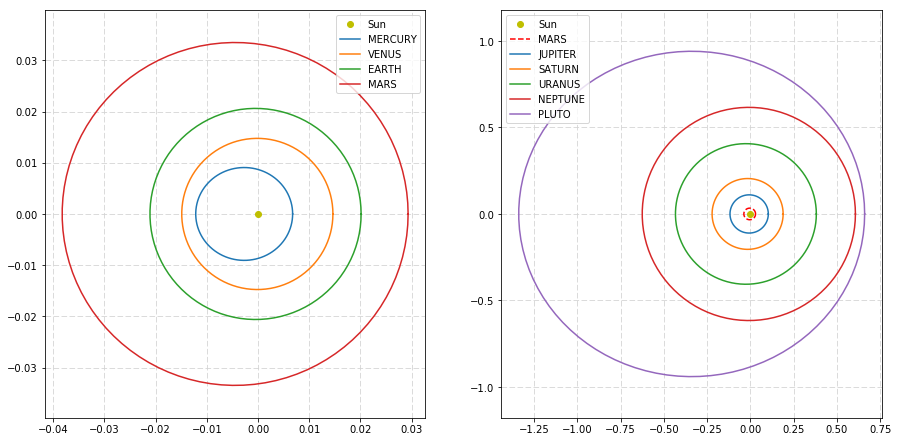

In [13]:
fig,(ax1,ax2)= plt.subplots(1,2,figsize=(15, 7.5))

ax1.plot(0,0,'oy',label='Sun')
for i in range(0,4):
    c=np.sqrt(a_semi_major[i]**2 - b_semi_minor[i]**2)
    t = np.linspace(0, 2*pi, 100)
    ax1.plot( a_semi_major[i]*np.cos(t)-c , b_semi_minor[i]*np.sin(t),label=Planets[i] )

ax1.axis('equal')
ax1.grid(color='lightgray',linestyle='--')
ax1.legend()

ax2.plot(0,0,'oy',label='Sun')
ax2.plot( a_semi_major[3]*np.cos(t)-c , b_semi_minor[3]*np.sin(t),label=Planets[3],linestyle='--',color='red' )

for i in range(4,eccentricity.size):
    c=np.sqrt(a_semi_major[i]**2 - b_semi_minor[i]**2)
    t = np.linspace(0, 2*pi, 100)
    ax2.plot( a_semi_major[i]*np.cos(t)-c , b_semi_minor[i]*np.sin(t),label=Planets[i] )

ax2.axis('equal')
ax2.grid(color='lightgray',linestyle='--')
ax2.legend()
plt.show()

[Solar System Scale Model Calculator](http://thinkzone.wlonk.com/SS/SolarSystemModel.php)
